In [85]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

from scipy.stats import pearsonr

In [4]:
oliebollentest = pd.read_csv('./combined/oliebollentest.csv')

In [28]:
years = oliebollentest['Jaar'].unique().tolist()
for year in years:
    mean = round(
        oliebollentest[
            (oliebollentest['Jaar'] == year) & (oliebollentest['Plaats op ranglijst'] <= 10)
        ]['Prijs per stuk in €'].mean()
        , 2)
    mean2 = round(
        oliebollentest[
            (oliebollentest['Jaar'] == year) & (oliebollentest['Plaats op ranglijst'] <= 10)
        ]['Aanbieding prijs'].mean()
        , 2)
    print("Average price for top-10 oliebol in {}: €{} / €{}".format(year, mean, mean2))
    

Average price for top-10 oliebol in 2014: €0.95 / €nan
Average price for top-10 oliebol in 2015: €0.91 / €0.82
Average price for top-10 oliebol in 2016: €0.94 / €0.88
Average price for top-10 oliebol in 2017: €0.96 / €0.85


In [50]:
for year in years:
    
    rowsperyear = oliebollentest['Jaar'] == year
    top10rowsperyear = rowsperyear & (oliebollentest['Plaats op ranglijst'] <= 10)
    top75rowsperyear = rowsperyear & (oliebollentest['Plaats op ranglijst'] <= 75)
        
    prijsregulier = round(oliebollentest[top10rowsperyear]['Prijs per stuk in €'].mean(), 2)
    prijsaanbieding = round(oliebollentest[top10rowsperyear]['Aanbieding prijs'].mean(), 2)
    gewicht = round(oliebollentest[top10rowsperyear]['Gewicht in gram'].mean(), 2)
    vetpercentage = round(oliebollentest[top10rowsperyear]['Vetpercentage'].mean(), 2)

    print(year)
    
    print("""    Top-10:
        Prijs €{}
        Aanbieding prijs €{}
        Gewicht {} gram
        Vetpercentage {}%""".format(prijsregulier, prijsaanbieding, gewicht, vetpercentage))
    
    prijsregulier = round(oliebollentest[top75rowsperyear]['Prijs per stuk in €'].mean(), 2)
    prijsaanbieding = round(oliebollentest[top75rowsperyear]['Aanbieding prijs'].mean(), 2)
    gewicht = round(oliebollentest[top75rowsperyear]['Gewicht in gram'].mean(), 2)
    vetpercentage = round(oliebollentest[top75rowsperyear]['Vetpercentage'].mean(), 2)
    numberofcontestants = str(len(oliebollentest[top75rowsperyear]))

    print("""    Top-75:
        Prijs €{}
        Aanbieding prijs €{}
        Gewicht {} gram
        Vetpercentage {}%""".format(prijsregulier, prijsaanbieding, gewicht, vetpercentage))
    
    prijsregulier = round(oliebollentest[rowsperyear]['Prijs per stuk in €'].mean(), 2)
    prijsaanbieding = round(oliebollentest[rowsperyear]['Aanbieding prijs'].mean(), 2)
    gewicht = round(oliebollentest[rowsperyear]['Gewicht in gram'].mean(), 2)
    vetpercentage = round(oliebollentest[rowsperyear]['Vetpercentage'].mean(), 2)
    numberofcontestants = str(len(oliebollentest[rowsperyear]))
    
    print("""    Alle deelnemers:
        Prijs €{}
        Aanbieding prijs €{}
        Gewicht {} gram
        Vetpercentage {}%
        Deelnemers {}""".format(prijsregulier, prijsaanbieding, gewicht, vetpercentage, numberofcontestants))
    

2014
    Top-10:
        Prijs €0.95
        Aanbieding prijs €nan
        Gewicht 95.1 gram
        Vetpercentage 12.77%
    Top-75:
        Prijs €0.95
        Aanbieding prijs €nan
        Gewicht 95.1 gram
        Vetpercentage 12.77%
    Alle deelnemers:
        Prijs €0.95
        Aanbieding prijs €nan
        Gewicht 95.1 gram
        Vetpercentage 12.77%
        Deelnemers 10
2015
    Top-10:
        Prijs €0.91
        Aanbieding prijs €0.82
        Gewicht 98.0 gram
        Vetpercentage 12.07%
    Top-75:
        Prijs €0.91
        Aanbieding prijs €0.82
        Gewicht 92.8 gram
        Vetpercentage 11.06%
    Alle deelnemers:
        Prijs €0.92
        Aanbieding prijs €0.79
        Gewicht 90.98 gram
        Vetpercentage 10.01%
        Deelnemers 164
2016
    Top-10:
        Prijs €0.94
        Aanbieding prijs €0.88
        Gewicht 93.03 gram
        Vetpercentage 13.34%
    Top-75:
        Prijs €0.94
        Aanbieding prijs €0.83
        Gewicht 93.51 gram
       

In [49]:
# Plot ontwikkeling over de jaren 2014-2017 in top-10
# Plot ontwikkeling over de jaren 2015-2017 in top-75
# Plot ontwikkeling over de jaren 2015-2016 in top-160

# Plot correlaties tussen prijs/aanbiedingsprijs/gewicht/vet en rank (2014-2017)
# Plot correlaties tussen prijs/aanbiedingsprijs/gewicht/vet en cijfer (2014-2016)
# Plot correlaties tussen allerlei cijfers en rank/cijfer (2014)

In [120]:
oliebollentest_correlation = oliebollentest[['identifier', 'Jaar', 'Plaats op ranglijst', 'Prijs per stuk in €', 'Aanbieding prijs', 'Gewicht in gram', 'Vetpercentage']]
oliebollentest_correlation = oliebollentest_correlation.set_index(['identifier'])

# oliebollentest_correlation = oliebollentest_correlation[oliebollentest_correlation['Jaar'] != 2014]

oliebollentest_correlation.head()

,Jaar,Plaats op ranglijst,Prijs per stuk in €,Aanbieding prijs,Gewicht in gram,Vetpercentage
identifier,,,,,,
"Bakkerij Brokking, IJsselstein",2014,1.0,0.94,NaN,93.0,13.3
"De Verswinkel Ruud & Chantal Gremmee, Rossum",2014,2.0,0.85,NaN,101.0,12.2
"Gebakkraam Richard Visser, Rotterdam",2014,3.0,1.00,NaN,90.0,13.4
"Bakkerij Olink, Maarssen",2014,4.0,1.00,NaN,110.0,13.6
"Meesterbakker Voskamp, Spijkenisse",2014,5.0,1.00,NaN,96.0,15.6


Correlation between 'Plaats op ranglijst' and 'Gewicht in gram' of -0.28, with a p-value of 5.5e-09


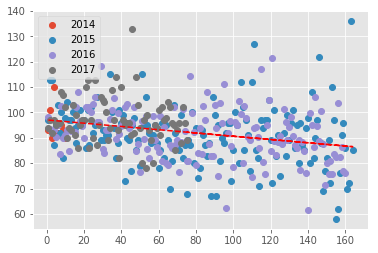

Correlation between 'Plaats op ranglijst' and 'Prijs per stuk in €' of -0.12, with a p-value of 0.02


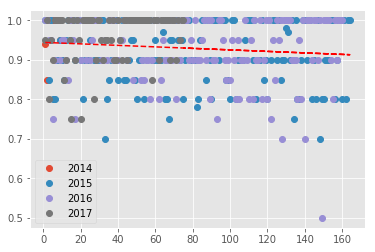

Correlation between 'Plaats op ranglijst' and 'Aanbieding prijs' of nan, with a p-value of 1


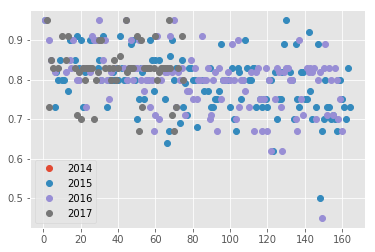

Correlation between 'Plaats op ranglijst' and 'Vetpercentage' of -0.43, with a p-value of 3.5e-20


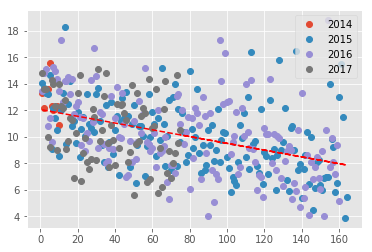

Correlation between 'Prijs per stuk in €' and 'Aanbieding prijs' of nan, with a p-value of 1


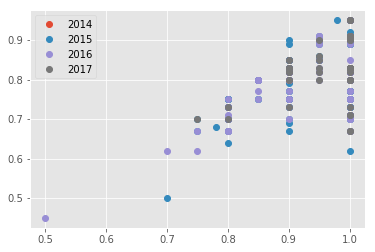

Correlation between 'Gewicht in gram' and 'Vetpercentage' of -0.01, with a p-value of 0.87


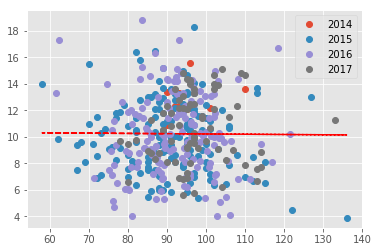

In [121]:
pairs = [
    ('Plaats op ranglijst', 'Gewicht in gram'),
    ('Plaats op ranglijst', 'Prijs per stuk in €'),
    ('Plaats op ranglijst', 'Aanbieding prijs'),
    ('Plaats op ranglijst', 'Vetpercentage'),
    ('Prijs per stuk in €', 'Aanbieding prijs'),
    ('Gewicht in gram', 'Vetpercentage'),
]

for pair in pairs:
    corr, p_value = pearsonr(oliebollentest_correlation[pair[0]], oliebollentest_correlation[pair[1]])
    print("Correlation between '{}' and '{}' of {}, with a p-value of {:.2g}".format(
        pair[0], pair[1], round(corr, 2), p_value))
    
    groups = oliebollentest_correlation.groupby('Jaar')
    
    fig, ax = plt.subplots()
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    for name, group in groups:
        ax.plot(group[pair[0]], group[pair[1]], marker='.', linestyle='', ms=12, label=name)
    ax.legend()
    
    z = pd.np.polyfit(oliebollentest_correlation[pair[0]], oliebollentest_correlation[pair[1]], 1)
    p = pd.np.poly1d(z)
    plt.plot(oliebollentest_correlation[pair[0]], p(oliebollentest_correlation[pair[0]]),"r--")

    plt.show()

,Jaar,Plaats op ranglijst,Prijs per stuk in €,Aanbieding prijs,Gewicht in gram,Vetpercentage
Jaar,1.000000,-0.198006,0.168653,0.158189,0.154810,0.019090
Plaats op ranglijst,-0.198006,1.000000,-0.115232,-0.393625,-0.283310,-0.433644
Prijs per stuk in €,0.168653,-0.115232,1.000000,0.541970,0.211798,-0.001658
Aanbieding prijs,0.158189,-0.393625,0.541970,1.000000,0.328576,0.246197
Gewicht in gram,0.154810,-0.283310,0.211798,0.328576,1.000000,-0.007804
Vetpercentage,0.019090,-0.433644,-0.001658,0.246197,-0.007804,1.000000


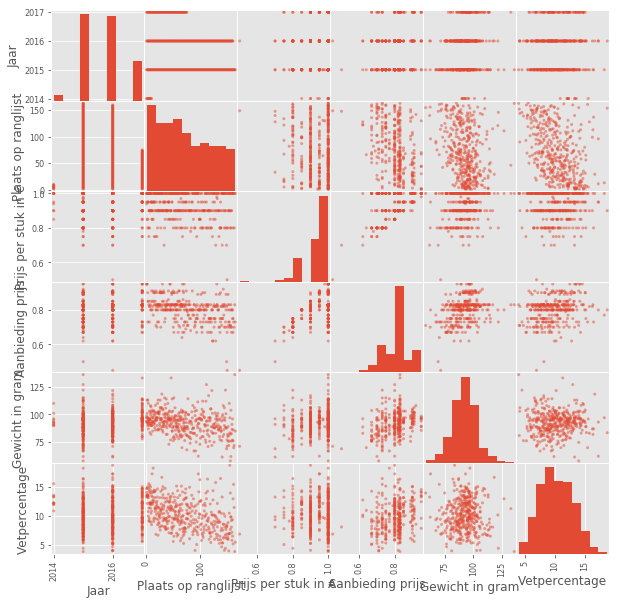

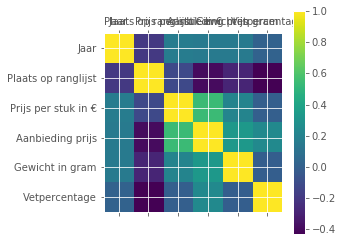

In [122]:
display(oliebollentest_correlation.corr())

pd.plotting.scatter_matrix(oliebollentest_correlation, figsize=(10, 10))
plt.show()

plt.matshow(oliebollentest_correlation.corr())
plt.xticks(range(len(oliebollentest_correlation.columns)), oliebollentest_correlation.columns)
plt.yticks(range(len(oliebollentest_correlation.columns)), oliebollentest_correlation.columns)
plt.colorbar()
plt.show()